In [33]:
# importing all relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [3]:
df_weather = pd.read_csv('hourly_weather.csv')

In [4]:
df_weather.shape

(897359, 8)

In [6]:
df_weather.head()

,"London, United Kingdom",2018-09-01,0,17,17.1,1025,6,0.0
0,"London, United Kingdom",2018-09-01,100,17,17,1025,6,0.0
1,"London, United Kingdom",2018-09-01,200,17,17,1025,7,0.0
2,"London, United Kingdom",2018-09-01,300,16,16,1024,7,0.0
3,"London, United Kingdom",2018-09-01,400,16,16,1025,7,0.0
4,"London, United Kingdom",2018-09-01,500,16,16,1025,7,0.0


In [20]:
df_weather.dtypes

London, United Kingdom     object
2018-09-01                 object
0                           int64
17                          int64
17.1                        int64
1025                        int64
6                           int64
0.0                       float64
dtype: object

Straight away, we see a flagrant issue: there aren't any column headers. Let's add them for some clarity. Furthermore, some data types are off (precipMM is a float type and the temperatures, the pressure and the windspeed should also be because of the nature of the variables). The date and the hour should be converted to datetime formats that we will be able to use for modelling later on.

In [5]:
df_weather_w_cols = df_weather.T.reset_index().T.reset_index(drop=True)
df_weather_w_cols.columns= ['city','date','hour','tempC','feelsLikeC','pressure','windspeedKmph','precipMM']

In [6]:
df_weather_w_cols.dtypes

city             object
date             object
hour             object
tempC            object
feelsLikeC       object
pressure         object
windspeedKmph    object
precipMM         object
dtype: object

Dtypes have been converted because of the addition of the column names as the first row. Let's go ahead and convert the data types. 

In [7]:
df_weather_w_cols[['tempC','feelsLikeC','pressure','windspeedKmph','precipMM']]= df_weather_w_cols[['tempC','feelsLikeC','pressure','windspeedKmph','precipMM']].copy().astype(float)
df_weather_w_cols['date'] = pd.to_datetime(df_weather_w_cols['date'].copy())

In [8]:
# checking if the collection is done hourly for all cities
df_weather_w_cols.hour.nunique()

25

In [9]:
df_weather_w_cols.dtypes

city                     object
date             datetime64[ns]
hour                     object
tempC                   float64
feelsLikeC              float64
pressure                float64
windspeedKmph           float64
precipMM                float64
dtype: object

In [10]:
# quick check for missing values
df_weather_w_cols.isna().sum()

city             0
date             0
hour             0
tempC            0
feelsLikeC       0
pressure         0
windspeedKmph    0
precipMM         0
dtype: int64

No missing values, good start.

In [11]:
# checking the data collection has been regular
df_weather_w_cols.groupby('city').size()

city
Birmingham, United Kingdom    89736
Bristol, United Kingdom       89736
Edinburgh, United Kingdom     89736
Glasgow, United Kingdom       89736
Leeds, United Kingdom         89736
Liverpool, United Kingdom     89736
London, United Kingdom        89736
Manchester, United Kingdom    89736
Newcastle, United Kingdom     89736
Sheffield, United Kingdom     89736
dtype: int64

All cities have the same number of rows. Let's see if they also have the same dates of collection.

In [19]:
df_describe = df_weather_w_cols[['city','date']].copy().groupby('city').describe()
df_describe

date                                   \
                            count unique                  top freq   
city                                                                 
Birmingham, United Kingdom  89736   3739  2018-07-17 00:00:00   24   
Bristol, United Kingdom     89736   3739  2018-07-17 00:00:00   24   
Edinburgh, United Kingdom   89736   3739  2018-07-17 00:00:00   24   
Glasgow, United Kingdom     89736   3739  2018-07-17 00:00:00   24   
Leeds, United Kingdom       89736   3739  2018-07-17 00:00:00   24   
Liverpool, United Kingdom   89736   3739  2018-07-17 00:00:00   24   
London, United Kingdom      89736   3739  2018-07-17 00:00:00   24   
Manchester, United Kingdom  89736   3739  2018-07-17 00:00:00   24   
Newcastle, United Kingdom   89736   3739  2018-07-17 00:00:00   24   
Sheffield, United Kingdom   89736   3739  2018-07-17 00:00:00   24   

                                                                      
                                          first                 last  
city                                                                  
Birmingham, United Kingdom  2008-09-01 00:00:00  2018-11-26 00:00:00  
Bristol, United Kingdom     2008-09-01 00:00:00  2018-11-26 00:00:00  
Edinburgh, United Kingdom   2008-09-01 00:00:00  2018-11-26 00:00:00  
Glasgow, United Kingdom     2008-09-01 00:00:00  2018-11-26 00:00:00  
Leeds, United Kingdom       2008-09-01 00:00:00  2018-11-26 00:00:00  
Liverpool, United Kingdom   2008-09-01 00:00:00  2018-11-26 00:00:00  
London, United Kingdom      2008-09-01 00:00:00  2018-11-26 00:00:00  
Manchester, United Kingdom  2008-09-01 00:00:00  2018-11-26 00:00:00  
Newcastle, United Kingdom   2008-09-01 00:00:00  2018-11-26 00:00:00  
Sheffield, United Kingdom   2008-09-01 00:00:00  2018-11-26 00:00:00

The dates look uniform across all cities: approximately 10 years and 3 months worth of hourly recordings. Let's make sure we don't have any duplicates.

In [24]:
df_weather_w_cols.duplicated().sum()

0

Looks good: no duplicated rows. Now we want to create two additional features: a meteorological season feature and a timestamp feature. 

In [25]:
# extract day of year from meteorological season dates
pd.to_datetime(pd.Series(['2020-03-01','2020-06-01','2020-09-01','2020-12-01'])).dt.dayofyear

0     61
1    153
2    245
3    336
dtype: int64

In [26]:
df_weather_w_cols['season'] = pd.cut(df_weather_w_cols.date.dt.dayofyear,bins=[0,60, 152,244,335,367],labels=['winter','spring','summer','autumn','Winter']).str.replace('Winter','winter')

In [27]:
# add the timestamp 
# feelsLikeC x rest
# find a way to predict humidity
# plot stats of season city, means, std, median etc for optimal city
df_weather_w_cols

,city,date,hour,tempC,feelsLikeC,pressure,windspeedKmph,precipMM,season
0,"London, United Kingdom",2018-09-01,0,17.0,17.1,1025.0,6.0,0.0,summer
1,"London, United Kingdom",2018-09-01,100,17.0,17.0,1025.0,6.0,0.0,summer
2,"London, United Kingdom",2018-09-01,200,17.0,17.0,1025.0,7.0,0.0,summer
3,"London, United Kingdom",2018-09-01,300,16.0,16.0,1024.0,7.0,0.0,summer
4,"London, United Kingdom",2018-09-01,400,16.0,16.0,1025.0,7.0,0.0,summer
5,"London, United Kingdom",2018-09-01,500,16.0,16.0,1025.0,7.0,0.0,summer
6,"London, United Kingdom",2018-09-01,600,16.0,16.0,1025.0,8.0,0.0,summer
7,"London, United Kingdom",2018-09-01,700,17.0,17.0,1026.0,8.0,0.0,summer
8,"London, United Kingdom",2018-09-01,800,19.0,19.0,1026.0,9.0,0.0,summer
9,"London, United Kingdom",2018-09-01,900,20.0,20.0,1026.0,10.0,0.0,summer


Let's have a look at how the numerical variables interact with each other.

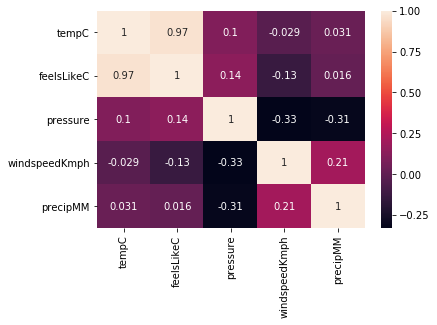

In [20]:

sns.heatmap(df_weather_w_cols[['tempC','feelsLikeC','pressure','windspeedKmph','precipMM']].corr(),annot=True)


As expected, windspeed seems to have a negative impact on the feelsLike temperature and pressure and positive one. The rainfall, however appears to have a positive impact on the temperature, not a large coefficient but still surprising nonetheless. 

If we wanted to find the ideal location to live, we would investigate the seasonal feelslike temperature variations across the cities.

In [30]:
seasonal_df = df_weather_w_cols.groupby(['city','season']).describe()

In [36]:
season_feelsLike = seasonal_df['feelsLikeC']

To visualise the difference let's plot the seasonal values

In [41]:
season_means = season_feelsLike['mean'].reset_index()

In [76]:
season_means.city.unique()

array(['Birmingham, United Kingdom', 'Bristol, United Kingdom',
       'Edinburgh, United Kingdom', 'Glasgow, United Kingdom',
       'Leeds, United Kingdom', 'Liverpool, United Kingdom',
       'London, United Kingdom', 'Manchester, United Kingdom',
       'Newcastle, United Kingdom', 'Sheffield, United Kingdom'],
      dtype=object)

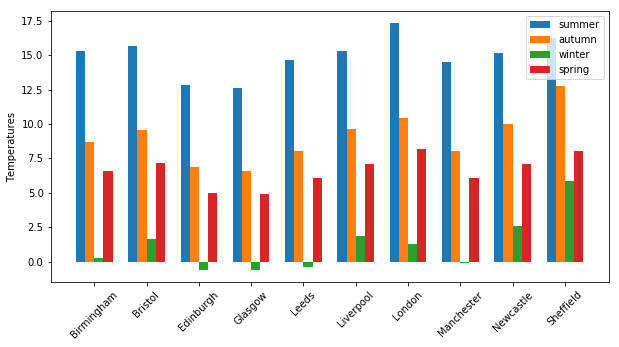

In [84]:
summer = season_means[season_means.season=='summer']['mean']
autumn = season_means[season_means.season=='autumn']['mean']
winter = season_means[season_means.season=='winter']['mean']
spring = season_means[season_means.season=='spring']['mean']

labels = list(season_means.city.str.replace(', United Kingdom','').unique())
x = np.array(range(len(summer)))*2
width=0.35

fig, ax = plt.subplots(figsize=(10,5))
s1 = ax.bar(x - (width+width/2), summer, width,label='summer')
s2 = ax.bar(x - width/2, autumn,width, label='autumn')
s3 = ax.bar(x + width/2, winter,width, label='winter')
s4 = ax.bar(x + (width+width/2), spring,width, label='spring')

ax.set_ylabel('Temperatures')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=45)
ax.legend()

Seems as though Sheffield has the warmest Winters but not necessarily the warmest overall. Depending on preferences one could select a city based on it's seasonal temperatures, one could also run a similar analysis for rainfall, again, depending on preferences.

Regarding the prediction of humidity, on could attempt to model it's effect on the feelsLike temperature based on the relative effect of the other factors (pressure, wind etc) and deduce what the impact of humidity could be. But that would mean generalising exterior factors, which might end up not being the most accurate solutions. I would therefore not suggest trying to model the humidity based on this data set as it might be too inaccurate based on the assumptions we would need to make. 